In [1]:
from src.model import save_model
from src.metrics import model_metrics
from src.builder import detect_anomalies_main, DEFAULT_FEATURES
from src.data_upload import load_and_preprocess_data
from src.features import (
    create_rolling_features,
    add_geo_features
)
from src.visualization import (
    plot_tsne_latent,
    plot_training_curves,
    plot_error_distribution,
    plot_reconstruction_error_distribution
)

In [4]:
if __name__ == '__main__':
    df = load_and_preprocess_data(r'D:\Work\Diplom\data\raw\transactions.csv')

In [5]:
    df = create_rolling_features(df)

In [6]:
    df = add_geo_features(df)

D:\University\Diplom\.venv1\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\University\Diplom\.venv1\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [7]:
    df_test, model, scaler, history, x_test_scaled = detect_anomalies_main(df, r"D:\Work\Diplom\data\processed\anomalies.csv")

Epoch 1/50
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 2s 913us/step - loss: 0.4404 - val_loss: 0.2013 - learning_rate: 0.0010
Epoch 2/50
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 1s 852us/step - loss: 0.2008 - val_loss: 0.1281 - learning_rate: 0.0010
Epoch 3/50
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 1s 846us/step - loss: 0.1199 - val_loss: 0.1004 - learning_rate: 0.0010
Epoch 4/50
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - loss: 0.1086 - val_loss: 0.0909 - learning_rate: 0.0010
Epoch 5/50
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 1s 836us/step - loss: 0.2003 - val_loss: 0.0799 - learning_rate: 0.0010
Epoch 6/50
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - loss: 0.0908 - val_loss: 0.0777 - learning_rate: 0.0010
Epoch 7/50
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step - loss: 0.1210 - val_loss: 0.0754 - learning_rate: 0.0010
Epoch 8/50
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step - loss: 0.0684 - val_loss: 0.0735 - learning_rate: 0.0010
Epoch 9/50
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 1s 852us/step - loss: 0.0631 - val_loss: 0.074

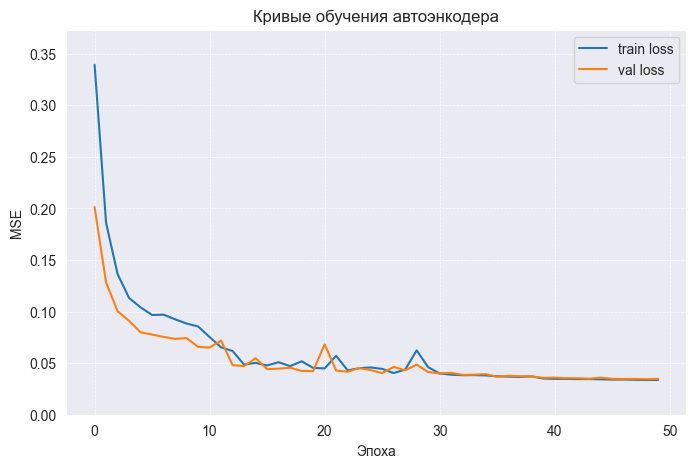

D:\University\Diplom\.venv1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8208 (\N{HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


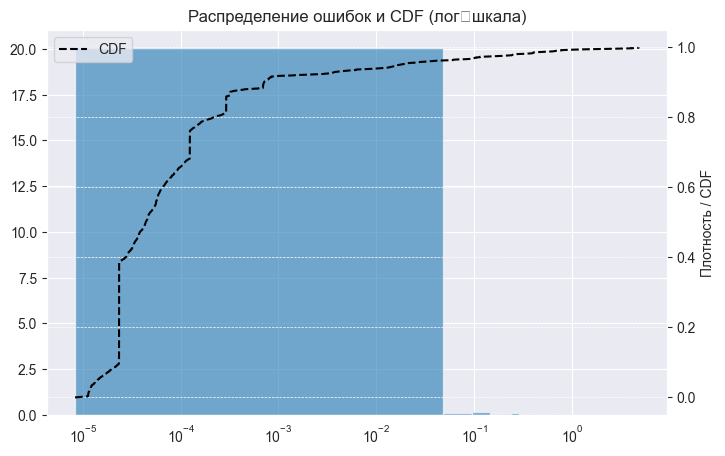

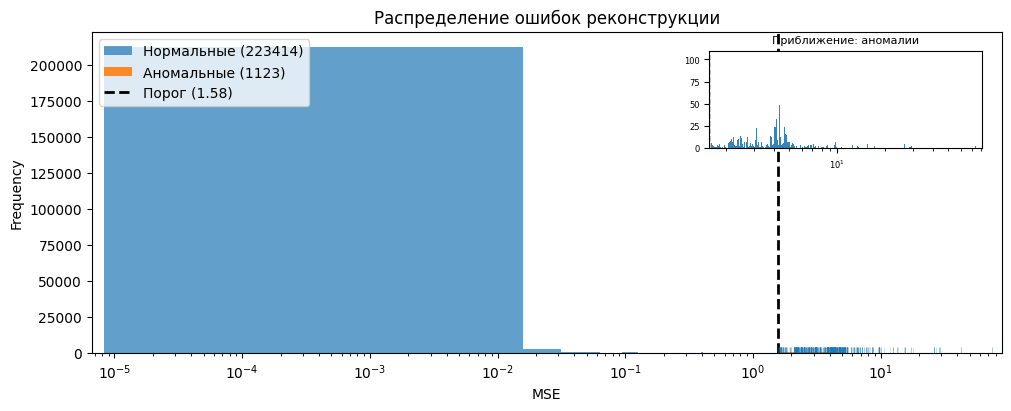

7017/7017 ━━━━━━━━━━━━━━━━━━━━ 2s 306us/step


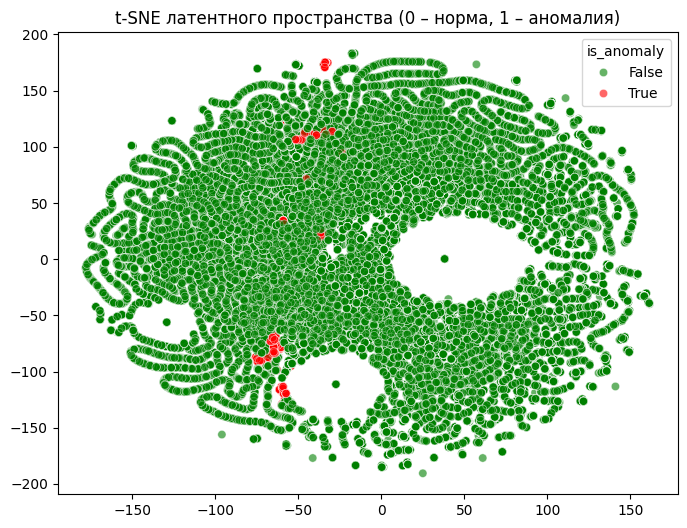

In [8]:
    plot_training_curves(history)
    plot_error_distribution(df_test)
    plot_reconstruction_error_distribution(df_test)
    plot_tsne_latent(model, df_test, scaler, DEFAULT_FEATURES)

In [9]:
    model_metrics(df_test, model, history, x_test_scaled)

Reconstruction Error Ratio (test/train): 1.02
Slope of CDF near threshold: 0.002
Jaccard 0.995 vs 0.992: 0.6398860398860399
Jaccard 0.995 vs 0.998: 0.396260017809439
7017/7017 ━━━━━━━━━━━━━━━━━━━━ 2s 325us/step
Silhouette score on latent space: 0.914


In [11]:
    save_model(model, r"D:\Work\Diplom\compiled_models\model.keras")